## Llava pretrained - Generation finetuning

In [1]:
from tqdm import tqdm

In [2]:
import os
from PIL import Image

from datasets import load_dataset

dataset = load_dataset("liuhaotian/LLaVA-Pretrain", data_files="blip_laion_cc_sbu_558k_meta.json")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'image', 'blip_caption', 'url'],
        num_rows: 558128
    })
})


In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'image', 'blip_caption', 'url'],
        num_rows: 558128
    })
})

In [7]:
for item in dataset["train"].select(range(364100)):
    print(item["blip_caption"])
    break

select luxury furniture 3 - inch gel memory foam mattress topper


In [19]:
len(dataset["train"])

558128

In [26]:
non_existing = []
for i in tqdm(range(len(dataset["train"]))):
    image = dataset["train"][0]
    image = os.path.join("/home/sa162103/workspace/datasets/LLaVA-Pretrained", dataset["train"][i]["image"])
    if not os.path.exists(image):
        non_existing.append(image)

100%|██████████| 558128/558128 [00:23<00:00, 24254.12it/s]


In [27]:
len(non_existing)

0

a slice of a lemon layer cake next to some plates


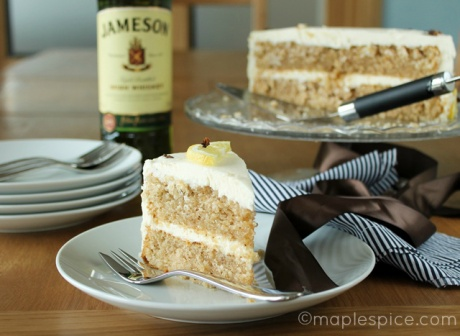

In [3]:
index = 1001
print(dataset["train"][index]["blip_caption"])
Image.open(os.path.join("/home/sa162103/workspace/datasets/LLaVA-Pretrain", dataset["train"][index]["image"]))

# Llava instruct - Understanding finetuning

In [4]:
import os
from PIL import Image
import json

from datasets import load_dataset, Features, Value, Sequence, Dataset
import csv
import pandas as pd
import os
import json
import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
from transformers import AutoTokenizer

In [36]:
def split_json(input_file, output_folder, output_prefix, shard_size=1000):
    """
    Splits a large JSON file into multiple smaller files (shards).
    
    :param input_file: Path to the input JSON file
    :param output_prefix: Prefix for output shard files (e.g., "shard_")
    :param shard_size: Number of elements per shard
    """
    # Open the input file for reading
    os.makedirs(output_folder, exist_ok=False)

    with open(input_file, 'r') as infile:
        data = json.load(infile)  # Load the entire JSON into memory (if it's manageable)
        
        # Calculate the number of shards
        num_shards = (len(data) // shard_size) + (1 if len(data) % shard_size else 0)
        
        for i in range(num_shards):
            # Get the slice of data for the current shard
            shard_data = data[i * shard_size : (i + 1) * shard_size]
            # Write the shard to a new JSON file
            output_file = f"{output_folder}/{output_prefix}{i+1}.json"
            with open(output_file, 'w') as outfile:
                json.dump(shard_data, outfile, indent=4)
            print(f"Created shard: {output_file}")

# Usage
input_file = "llava_v1_5_mix665k.json"  # Path to the large JSON file
output_prefix = "shard_"  # Prefix for the output files
shard_size = 500  # Number of elements per shard
output_folder = "llava_instruct_shards"
split_json(input_file, output_folder, output_prefix, shard_size)

Created shard: llava_instruct_shards/shard_1.json
Created shard: llava_instruct_shards/shard_2.json
Created shard: llava_instruct_shards/shard_3.json
Created shard: llava_instruct_shards/shard_4.json
Created shard: llava_instruct_shards/shard_5.json
Created shard: llava_instruct_shards/shard_6.json
Created shard: llava_instruct_shards/shard_7.json
Created shard: llava_instruct_shards/shard_8.json
Created shard: llava_instruct_shards/shard_9.json
Created shard: llava_instruct_shards/shard_10.json
Created shard: llava_instruct_shards/shard_11.json
Created shard: llava_instruct_shards/shard_12.json
Created shard: llava_instruct_shards/shard_13.json
Created shard: llava_instruct_shards/shard_14.json
Created shard: llava_instruct_shards/shard_15.json
Created shard: llava_instruct_shards/shard_16.json
Created shard: llava_instruct_shards/shard_17.json
Created shard: llava_instruct_shards/shard_18.json
Created shard: llava_instruct_shards/shard_19.json
Created shard: llava_instruct_shards/sha

In [67]:
from llava.llava import conversation as conversation_lib

In [68]:
DEFAULT_IMAGE_TOKEN = "<image>"
IGNORE_INDEX = -100
conversation_lib.default_conversation = conversation_lib.conv_templates["phi1.5"]
SYSTEM_PROMPT = "A chat between a curious user and an artificial intelligence assistant. " \
                "The assistant gives helpful, detailed, and polite answers to the user's questions."

In [81]:
from training.prompting_utils import UniversalPrompting
from llava.llava_instruct_data import LLaVAInstructDataset
from omegaconf import OmegaConf

config = OmegaConf.load("configs/showo_demo_512x512.yaml")

tokenizer = AutoTokenizer.from_pretrained(config.model.showo.llm_model_path, padding_side="left")
uni_prompting = UniversalPrompting(tokenizer, max_text_len=config.dataset.preprocessing.max_seq_length,
                                       special_tokens=(
                                           "<|soi|>", "<|eoi|>", "<|sov|>", "<|eov|>", "<|t2i|>",
                                           "<|mmu|>", "<|t2v|>", "<|v2v|>", "<|lvg|>"
                                       ),
                                       ignore_id=-100, cond_dropout_prob=config.training.cond_dropout_prob)


In [90]:
tokenizer.convert_tokens_to_ids(tokenizer.eos_token)

50256

In [82]:
data = LLaVAInstructDataset(tokenizer)

Formatting llava instruction data


In [ ]:
data[2]

{'input_ids': tensor([29904,    25,  4231,   262,   661,   287,   262,  2939, 41348, 35390,
           393,  3272,    12, 19315, 41348,    30, 24994,  8808,  8643,    25,
           383,   661,   287,   262,  2939,   389,  3272,    12, 19315, 41348,
           287,   262, 16479,    11,   355,   484,   389, 41348,   319,   257,
          8025,  2138,   621,   257, 14559, 22638,    13, 50256, 29904,    25,
          1374,   867,   661,   389,   287,   262,  2939,    30, 24994,  8808,
          8643,    25,  1318,   389,   734,   661,   287,   262,  2939,    11,
          1111,   319,  1341,   271,   287,   262,  6729,    13, 50256, 29904,
            25,  1867,  1611,   286,  2858,   389,   484, 41348,   287,    30,
         24994,  8808,  8643,    25,  1119,   389, 41348,   287,   257,  4898,
           276,  2858,    11,  1708,   257,  8025,   832,   262,  7150,   981,
         11191,   416,  6729,    13, 50256, 29904,    25,  2141,   262,  1341,
          3183,   423,   597,  3224,  7

In [88]:
tokenizer.decode(data[2]["input_ids"])

'USER: Are the people in the image skiing downhill or cross-country skiing? ASSISTANT: The people in the image are cross-country skiing in the woods, as they are skiing on a trail rather than a steep slope.<|endoftext|>USER: How many people are in the image? ASSISTANT: There are two people in the image, both on skis in the snow.<|endoftext|>USER: What kind of environment are they skiing in? ASSISTANT: They are skiing in a wooded environment, following a trail through the trees while surrounded by snow.<|endoftext|>USER: Do the skiers have any additional gear with them besides their skis and poles? ASSISTANT: Yes, the two male skiers are carrying backpacks while they ski through the woods. The backpacks might contain essentials for their skiing adventure, such as food, water, extra clothing, or safety equipment.<|endoftext|>'

In [63]:
class LlavaInstructDataset(Dataset):
    def __init__(self, root_folder, max_length, transform=None):
        self.root_folder = root_folder
        self.max_length = max_length  # The maximum number of items to yield
        self.transform = transform
        self.files = [f for f in os.listdir(root_folder) if f.endswith('.json')]
        self.current_length = 0  # Track the number of items yielded

    def _get_conversation(self, item):
        # Create a Conversation object for each item
        conversation = Conversation(
            system=item.get('system', ''),
            roles=("USER", "ASSISTANT"),
            version="v0",  # You can adjust this if needed
            messages=[],
            offset=0,
            sep_style=SeparatorStyle.TWO,  # Choose the style you prefer
            sep=" ",
            sep2="<|endoftext|>",
        )
        
        # Loop over the conversations in the item and append to the conversation object
        for convo in item['conversations']:
            conversation.append_message("USER", convo['from'])
            conversation.append_message("ASSISTANT", convo['value'])
        
        return conversation

    def _file_generator(self):
        for filename in self.files:
            file_path = os.path.join(self.root_folder, filename) 
            with open(file_path, 'r') as file:
                data = json.load(file)
                yield data

    def __iter__(self):
        # Iterate over files and yield conversations until we reach max_length
        for data in self._file_generator():
            for item in data:
                conversation = self._get_conversation(item)  # Get conversation object
                prompt = conversation.get_prompt()  # Get the formatted prompt from the conversation
                if self.current_length >= self.max_length:
                    return
                self.current_length += 1
                yield prompt, conversation

    def __len__(self):
        # Return the maximum length specified
        return self.max_length

    def get_image(self, image_path):
        # Load the image and apply any transformations
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

In [64]:
data = LlavaInstructDataset("llava_instruct_shards", "../datasets/", 510)

In [65]:
for i, item in enumerate(iter(data)):
    print(i, item)

0 (<PIL.Image.Image image mode=RGB size=640x487 at 0x71126C99C370>, '<image>\nHow many dessert items are on the white plate?')
1 (<PIL.Image.Image image mode=RGB size=640x487 at 0x71126C99F0D0>, 'There are three different dessert items on the white plate.')
2 (<PIL.Image.Image image mode=RGB size=640x487 at 0x71126C99E4A0>, 'What are the colors of the sauces surrounding the desserts?')
3 (<PIL.Image.Image image mode=RGB size=640x487 at 0x71126C99E440>, 'The colors of the sauces surrounding the desserts are red and yellow.')
4 (<PIL.Image.Image image mode=RGB size=640x487 at 0x71126C99C370>, 'Can you describe the presentation of the dessert plate?')
5 (<PIL.Image.Image image mode=RGB size=640x487 at 0x71126C99F0D0>, 'The dessert plate features a delicious and visually appealing presentation. There are three distinct dessert items, including a piece of cake, a pastry, and a strawberry treat. The plate is garnished with red and yellow sauces, which provide a pop of color and enhance the o

In [60]:
item

(<PIL.Image.Image image mode=RGB size=640x487>,
 '<image>\nHow many dessert items are on the white plate?')

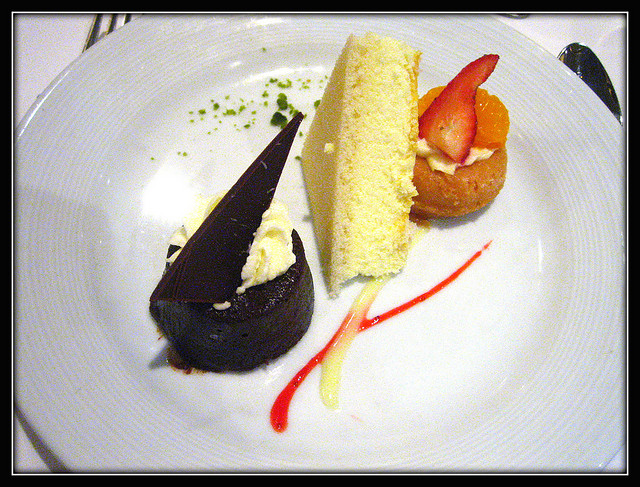

In [59]:
item[0]

In [7]:
with open("llava_v1_5_mix665k.json", "r") as f:
    data = json.load(f)

# Find any non-string `id` values
for item in data:
    if not isinstance(item["id"], str):
        print(f"Non-string id found: {item['id']} (type: {type(item['id'])})")

Non-string id found: 2354786 (type: <class 'int'>)
Non-string id found: 2375429 (type: <class 'int'>)
Non-string id found: 2368326 (type: <class 'int'>)
Non-string id found: 2331819 (type: <class 'int'>)
Non-string id found: 2324496 (type: <class 'int'>)
Non-string id found: 2325360 (type: <class 'int'>)
Non-string id found: 2410353 (type: <class 'int'>)
Non-string id found: 2322142 (type: <class 'int'>)
Non-string id found: 2328505 (type: <class 'int'>)
Non-string id found: 2347082 (type: <class 'int'>)
Non-string id found: 2377188 (type: <class 'int'>)
Non-string id found: 2355018 (type: <class 'int'>)
Non-string id found: 2389539 (type: <class 'int'>)
Non-string id found: 2378822 (type: <class 'int'>)
Non-string id found: 2358258 (type: <class 'int'>)
Non-string id found: 2356876 (type: <class 'int'>)
Non-string id found: 2403554 (type: <class 'int'>)
Non-string id found: 2316422 (type: <class 'int'>)
Non-string id found: 2412987 (type: <class 'int'>)
Non-string id found: 713265 (ty

In [1]:
import os
from PIL import Image
import json

from datasets import load_dataset, Features, Value, Sequence, Dataset
import csv
import pandas as pd
import os
import json
import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
from transformers import AutoTokenizer

In [3]:
data_file_path = "llava_v1_5_mix665k.json"

In [28]:
with open(data_file_path, 'r') as f:
    data = json.load(f)

In [29]:
max_number_of_items = 500_000

In [30]:
list_data_dict = []

for item in data:
    if len(list_data_dict) == max_number_of_items:
        break
    if 'image' in item.keys() and "coco" in item["image"]:
        list_data_dict.append(item)

In [31]:
len([x["image"] for x in list_data_dict if "coco" in x["image"]])

364100

In [38]:
non_exisiting = []
for item in tqdm(list_data_dict):
    image = item["image"]
    image_path = os.path.join("/home/sa162103/workspace/datasets/", image)
    if not os.path.exists(image_path):
        non_exisiting.append(image_path)

100%|██████████| 364100/364100 [00:01<00:00, 317787.66it/s]


In [39]:
non_exisiting

[]

In [1]:
from transformers import AutoModelForCausalLM, AutoConfig, PhiForCausalLM
from models.modeling_showo import Showo
# config = AutoConfig.from_pretrained("showlab/show-o")
model = Showo.from_pretrained("showlab/show-o")


# llm_model_path = "showlab/show-o"
# config = AutoConfig.from_pretrained(llm_model_path)
# showo = PhiForCausalLM(config)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
The config attributes {'mask_token_id': 58497} were passed to Showo, but are not expected and will be ignored. Please verify your config.json configuration file.
PhiForCausalLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If yo

attention implementation:  sdpa


The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The new lm_head weights will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
/home/sa162103/workspace/acv-showo/models/modeling_showo.py:49: FutureWarning: Accessing config attribute `w_clip_vit` directly via 'Showo' object attribute is deprecated. Please access 'w_clip_vit' over 'Showo's config object instead, e.g. 'unet.config.w_clip_vit'.
  if self.w_clip_vit:


In [5]:
model.showo.model.embed_tokens.weight.shape

torch.Size([58498, 2048])

In [7]:
model.showo


PhiForCausalLM(
  (model): PhiModel(
    (embed_tokens): Embedding(58498, 2048)
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-23): 24 x PhiDecoderLayer(
        (self_attn): PhiSdpaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=True)
          (k_proj): Linear(in_features=2048, out_features=2048, bias=True)
          (v_proj): Linear(in_features=2048, out_features=2048, bias=True)
          (dense): Linear(in_features=2048, out_features=2048, bias=True)
          (q_layernorm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (k_layernorm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
          (rotary_emb): PhiRotaryEmbedding()
        )
        (mlp): PhiMLP(
          (activation_fn): NewGELUActivation()
          (fc1): Linear(in_features=2048, out_features=8192, bias=True)
          (fc2): Linear(in_features=8192, out_features=2048, bias=True)
        )
        (input_layernorm): LayerNo